<a class="anchor" id="top_"></a>

## Some CAHC Explorations 
- [Moon Longitude and Longitude Diff by sidereal cycle](#m_l_ld)
- [Explore Moon Longitude by sidereal cycle](#m_l)
- [Analyze spread of lunar sidereal duration for each nakshatra](#n_s_sd)
- [Explore longitude diff at Full Moon between Moon and other Gruhas](#ld_m_g)
- [Explore Relation of Full Moon to Maasa Names](#fm_mn)
- [Mars and Moon Parvas](#Mars_and_Moon_Parvas)
- [Nakshatras Meta Data](#Nakshatras_Meta_Data)
- [Moon Dwell Time by Nakshatra Span](#Moon_Dwell_Time_by_Nakshatra_Span)
- [Moon Dwell Time by Nakshatra-Mid Span ](#Moon_Dwell_Time_by_Nakshatra_Mid_Span)

[top](#top_)

In [1]:

# # # Explore Moon, Sun, Gruha - Lat Lon Phase 
import NasaMoonScrapeUtils as nmsu
import PlanetPos
import JdUtils
import NaksUtils
import SCPUtils
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('display.float_format', '{:.2f}'.format)


### Explore Moon Longitude and Longitude Diff by sidereal cycle <a class="anchor" id="m_l_ld"></a> 
- For about a year moon longitude and longitude diff plotted every 4 hours
- Purpose is to spot patterns in rate of longitude change over the course of multiple sidereal cycles.

[top](#top_)

loaded ../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_0.167_jd_steps.csv


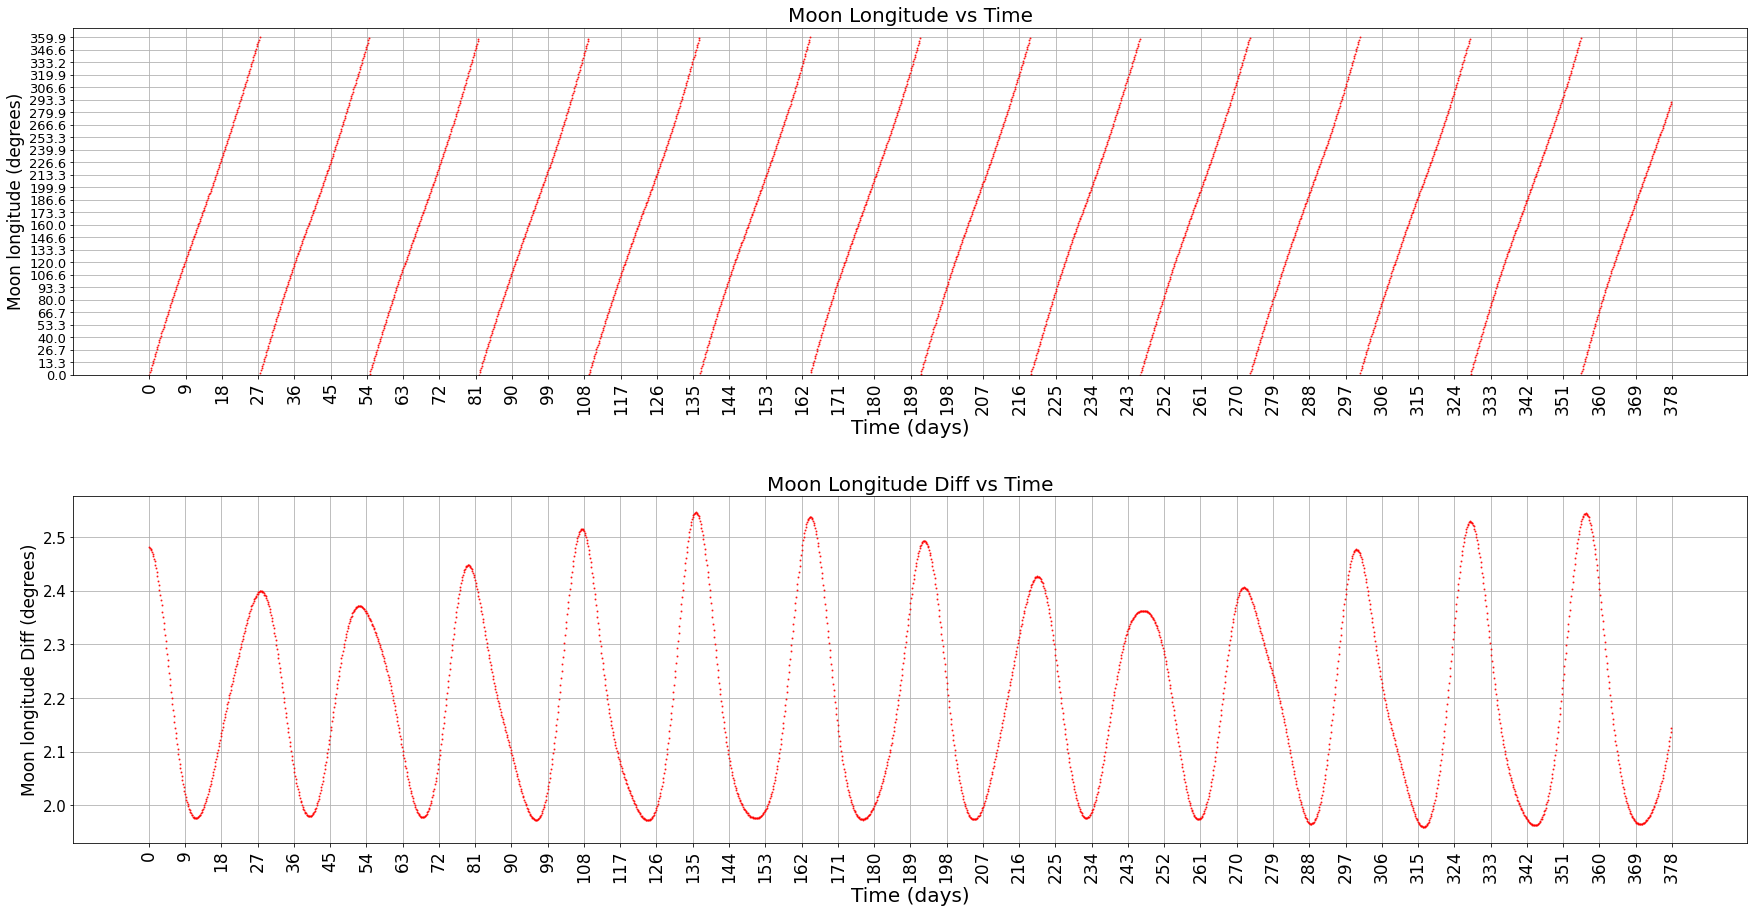

In [2]:

# import matplotlib.pyplot as plt
su = SCPUtils.SCPUtils()
mdf = su.mdf.copy()
# mdf.elati_Moon = [ m %360 for m in mdf.elati_Moon]
mdf.elong_Moon = [ m %360 for m in mdf.elong_Moon]
zero_moons = mdf[mdf.elong_Moon <= 0.01]
zero_moon_longs= pd.Series(zero_moons.index.values)

# zero_moon_longs.diff().plot( marker='o', alpha=0.8, figsize=(24,5))
fig, ax = plt.subplots(2,1, figsize=(24,10))
fig.subplots_adjust(hspace=.35)
colors = ['r', 'g', 'b']
for i  in range(1) : #len(zero_moon_longs)):
    lon = zero_moon_longs.iloc[i]
    plotdf = mdf.loc[lon:, ['elong_Moon']].iloc[0:27*6*14]
    # display(plotdf.head())
    plotdf.plot(kind='line', alpha=0.8, figsize=(30,15), marker='o', lw=0, label=f'{lon}', color=colors[i % len(colors)], markersize=1, ax=ax[0], grid=True, secondary_y=False, legend=not True)
    
    ax[0].set_xlabel('Time (days)', fontsize=20)
    xs = plotdf.index.values
    xticks = np.arange(xs[0], xs[-1]+1, (xs[-1]-xs[0])//40)
    xlabels = [int(x) for x in (xticks -xticks[0])]
    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels(xlabels, rotation=90, fontsize=17)

    ax[0].set_ylabel('Moon longitude (degrees)', fontsize=17)
    ys = np.arange(0,370, 13.33)
    yticks = ys
    ylabels = [f"{y:.1f}" for y in yticks]
    ax[0].set_ylim(0,370)
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(ylabels, rotation=0, fontsize=13)

    ax[0].set_title('Moon Longitude vs Time', fontsize=20)
    # ax[0].grid(True)

    # plt.show()
    plotdf.diff().apply(lambda x: x%360).plot(kind='line', alpha=0.8, figsize=(30,15), marker='o', lw=0, label=f'{lon}', color=colors[i % len(colors)], markersize=1, ax=ax[1], legend=False, grid=True, secondary_y= not True)
    ax1=ax[1]
    ax1.set_xlabel('Time (days)', fontsize=20)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xlabels, rotation=90, fontsize=17)

    ax1.set_ylabel('Moon longitude Diff (degrees)', fontsize=17)
    ax1.set_yticklabels( [ f"{y:.1f}" for y in ax[1].get_yticks()], rotation=0, fontsize=15)

    ax1.set_title('Moon Longitude Diff vs Time', fontsize=20)
    # plt.show()
    # mdf.loc[i:, 'elong_Moon'].iloc[0:30*4].plot(kind='line', alpha=0.8, figsize=(10,5), ax=ax, marker='o')


### Explore Moon Longitude by sidereal cycle <a class="anchor" id="m_l"></a>
- Polar plot of moon's longitude (theta) vs. earth-moon distance (r)
- First plot is for about an year 
- Second plot is for about a year but starting a 2.5 years later
- Third plot is for about 5 years
- All plots show poornima and amavasya
- Purpose is to see if the parvas show any affinity to certain longitudes ( nakshatras)

[top](#top_)

loaded ../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_0.167_jd_steps.csv


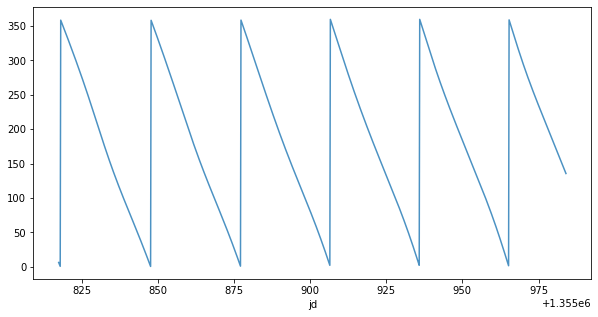

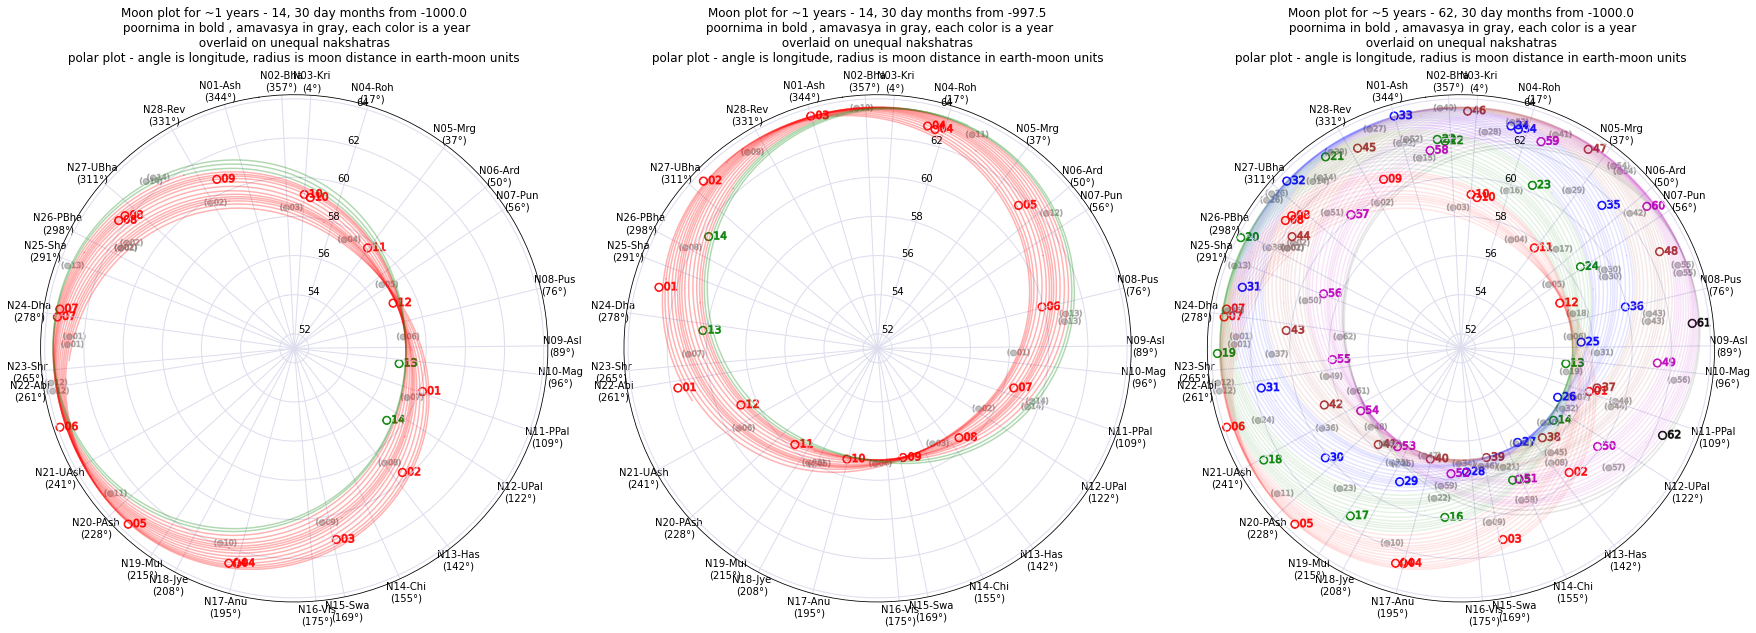

In [3]:

su = SCPUtils.SCPUtils()
su.mdf.iloc[:1000].sun_moon_angle.plot(kind='line', alpha=0.8, figsize=(10,5))
fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(wspace=.15)
ax1 = fig.add_subplot(131, polar=True)
ax2 = fig.add_subplot(132, polar=True)
ax3 = fig.add_subplot(133, polar=True)

su.plot_moon_cycle(num_years=1, ax=ax1)
su.plot_moon_cycle(num_years=1, offset_years=2.5, ax=ax2)
su.plot_moon_cycle(num_years=5, ax=ax3)
plt.show()


### Analyze spread of lunar sidereal duration for each nakshatra <a class="anchor" id="n_s_sd"></a>
- Assume Chitra mid as reference - Spica -  α Vir @ 173.33° longitude
- Use SCP paramaters for span of each nakshatra to project other longitudes

[top](#top_)

In [4]:
## Compute longitude of Nakshatras assuming Chitra at 173.33 using muhurta spans in SCP
nu = NaksUtils.NaksUtils()
chitra_lon = 173.33
chitraadi_scp_muhurta = nu.df28.scp_muhurta[13:].append(nu.df28.scp_muhurta[:13])
muhurta_to_degrees = 360/nu.df28.scp_muhurta.sum()
chitra_span_muhurta = chitraadi_scp_muhurta[0] 
lon_right_scp = ((chitraadi_scp_muhurta.cumsum() - 1*nu.df28.scp_muhurta ) * muhurta_to_degrees + chitra_lon) %360 
lon_right_scp = lon_right_scp.sort_index()
lon_left_scp = lon_right_scp[1:].append(lon_right_scp[0:1])

nu.df28['scp_lon_left'] = lon_left_scp#%360
nu.df28['scp_lon_right'] = lon_right_scp + nu.df28.scp_muhurta * muhurta_to_degrees  #%360
nu.df28[['nid',  'scp_lon_left', 'scp_lon_right', 'scp_muhurta']]

,nid,scp_lon_left,scp_lon_right,scp_muhurta
0,N01-Ash,1.99,15.17,30.00
1,N02-Bha,15.17,21.76,15.00
2,N03-Kri,21.76,34.94,30.00
3,N04-Roh,34.94,54.71,45.00
4,N05-Mrg,54.71,67.89,30.00
5,N06-Ard,67.89,74.48,15.00
6,N07-Pun,74.48,94.25,45.00
7,N08-Pus,94.25,107.43,30.00
8,N09-Asl,107.43,114.02,15.00
9,N10-Mag,114.02,127.20,30.00


### SCP Nakshatras  <a class="anchor" id="SCP_Nakshatras"></a>

[top](#top_)

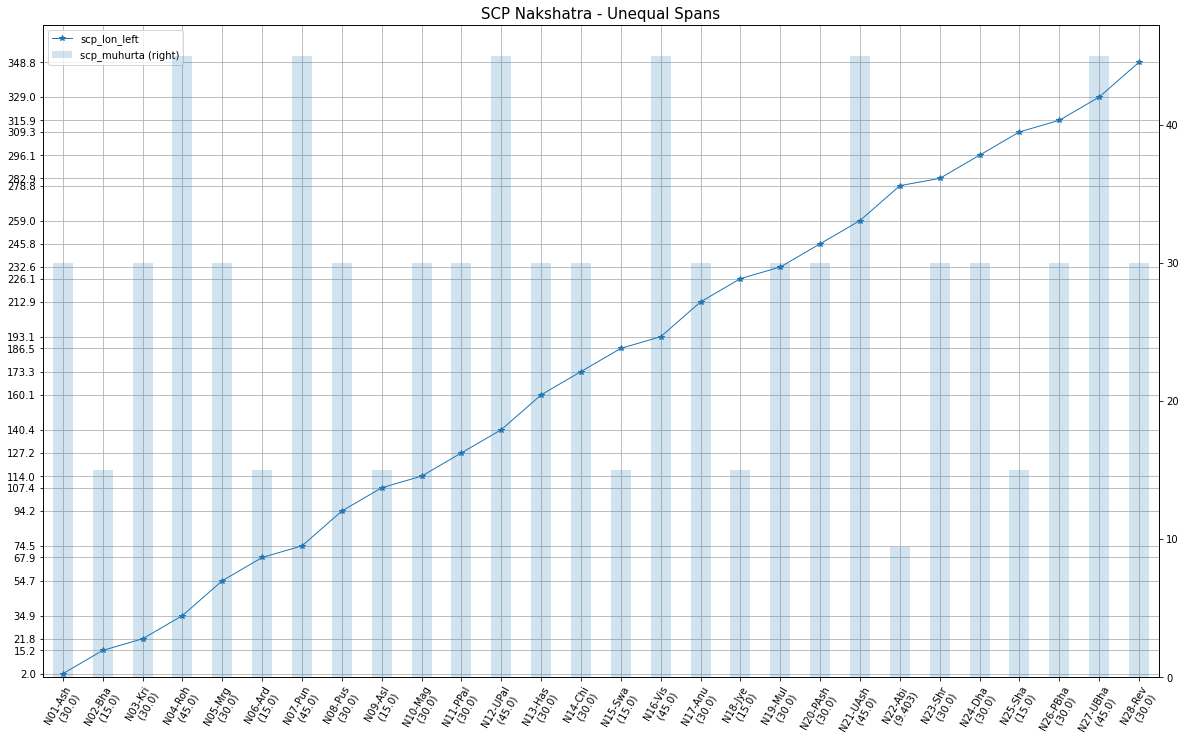

In [5]:
ax = nu.df28[['nid' , 'scp_lon_left']].plot( kind='line', lw=1, marker='*') #secondary_y=['scp_muhurta'], figsize=(20,10))
nu.df28[['nid', 'scp_muhurta']].plot.bar( secondary_y=['scp_muhurta'], figsize=(20,12), ax =ax, alpha=0.2)

ax.set_xticklabels(
	[ f"{nid}\n  ({mv})" for nid ,mv in zip(nu.df28.nid.values, nu.df28.scp_muhurta.values) ], 
	rotation=60, fontsize=10)
ax.set_yticks(nu.df28.scp_lon_left)
ax.set_ylim(0,370)
ax.grid(True)
ax.set_title('SCP Nakshatra - Unequal Spans', fontsize=15);

In [6]:
# np.linspace([1,10,100],[10,100,1000],5)
# # np.linspace( mdf.iloc[0], mdf.iloc[1],4)
# xdf = mdf.reset_index()[['jd', 'elati_Moon', 'elong_Moon', 'r_Moon', 'elong_Sun', 'sun_moon_angle']].values
# xdf

In [7]:
mdf.reset_index()[['jd', 'elati_Moon', 'elong_Moon', 'r_Moon', 'elong_Sun', 'sun_moon_angle']].values[0,2]

274.966

In [8]:
from time import time

def interpolate_mdf(mdf, interpolate_span=4):
	xdf = mdf.reset_index()[['jd', 'elati_Moon', 'elong_Moon', 'r_Moon', 'elong_Sun', 'sun_moon_angle']].values
	acc = []
	start_time = time()
	for ix in range(len(xdf[:])-1) :
		if xdf[ix+1,2] > xdf[ix,2] :  #ensure elong_Moon is not transiting from 360 to 0 - to eliminate the spiky interpolation
			_ans = np.linspace(xdf[ix], xdf[ix+1], interpolate_span)[:-1] # interpolate between two points and ignore the last point as it is the same as first point of next chunk
			acc.append(_ans)
		if ( ix%50000 == 0) : print (f"Interpolating ... {(time() - start_time):.2f} seconds - {ix} rows")

	print (f"Concatenating ... {(time() - start_time):.2f} seconds")
	ydf = pd.concat([ pd.DataFrame(x) for x in acc[:]]);
	print (f"Done Concatenating ... {(time() - start_time):.2f} seconds")
	ydf.columns = ['jd', 'elati_Moon', 'elong_Moon', 'r_Moon', 'elong_Sun', 'sun_moon_angle']
	ydf = ydf.set_index('jd')
	return ydf
	# jd_step = f"{pd.Series(ydf.index).diff().mean():0.3f}"
	# fn = f"../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_{jd_step}_jd_steps.csv"
	# ydf.to_csv("../datasets/sun_moon_pos_-1000-01-01_for_100_years_in_0.056_jd_steps.csv")
	# f"Saved {fn}" 

mdf_interpolated = interpolate_mdf(mdf)

ts0= mdf_interpolated.index.to_series().min()
mdf_interpolated['ts'] = mdf_interpolated.index.to_series().apply(lambda x: x-ts0)
mdf_interpolated

Interpolating ... 0.00 seconds - 0 rows
Interpolating ... 11.57 seconds - 50000 rows
Interpolating ... 29.05 seconds - 100000 rows
Interpolating ... 50.72 seconds - 150000 rows
Interpolating ... 65.91 seconds - 200000 rows
Concatenating ... 76.63 seconds
Done Concatenating ... 419.51 seconds


,elati_Moon,elong_Moon,r_Moon,elong_Sun,sun_moon_angle,ts
jd,,,,,,
1355817.50,4.99,274.97,62.77,281.12,6.15,0.00
1355817.56,4.99,275.65,62.74,281.17,5.52,0.06
1355817.61,4.99,276.33,62.72,281.23,4.90,0.11
1355817.67,4.99,277.01,62.69,281.28,4.27,0.17
1355817.72,4.99,277.70,62.66,281.34,3.64,0.22
...,...,...,...,...,...,...
1392317.06,-1.76,255.74,60.41,256.04,120.30,36499.56
1392317.11,-1.82,256.48,60.45,256.10,239.61,36499.61
1392317.17,-1.89,257.22,60.49,256.15,358.93,36499.67


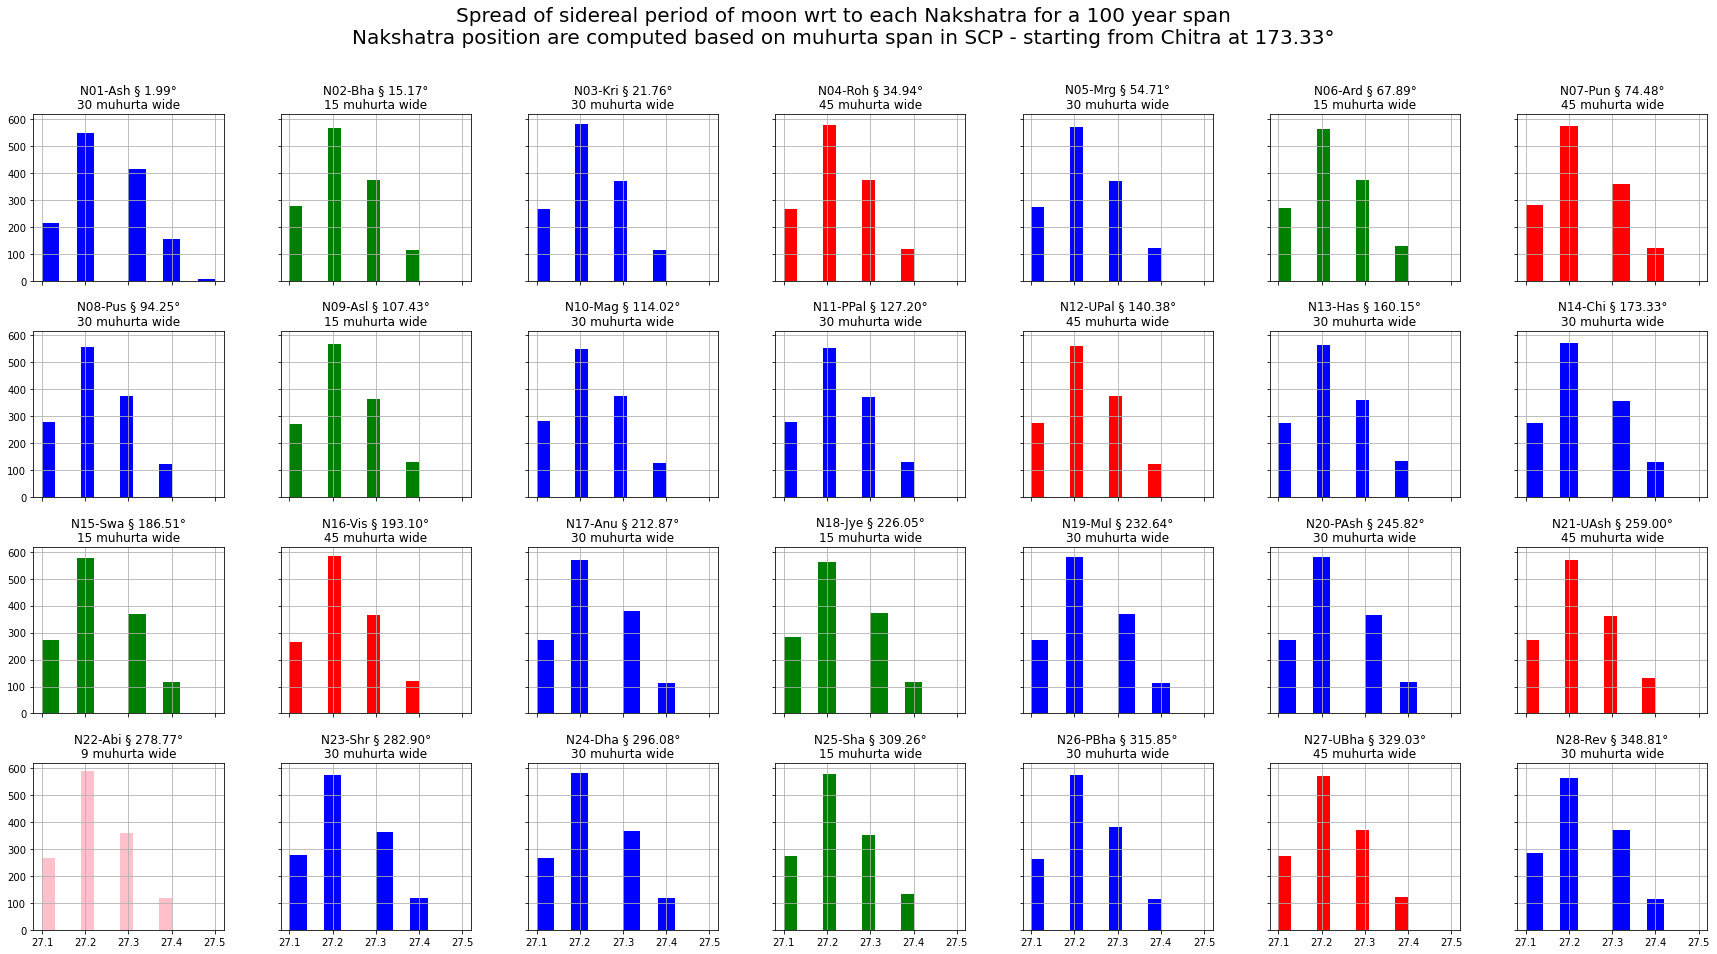

In [9]:
# # remove noisy interpolations while (1,2) => (1, 1.33, 1.66, 2)  , (360,0) => ( 360,240,120,0) 
# # the is (360,0) => (360,240,120,0) whose diffs are ( 360-prev=small, 240-360=-120, 0-240=-120, next-0=small) )
# mdf_interpolated['dx_'] = mdf_interpolated.elong_Moon.diff()
# mdf_interpolated = mdf_interpolated[(mdf_interpolated.dx_ >= -100) | (mdf_interpolated.dx_ < -200)].drop(columns=['dx_']) # drop the -120ish diffs

spread_ = mdf_interpolated.assign( ts_int= lambda x : np.round(x.ts,1) )
fig, axs = plt.subplots(4,7, figsize=(30,15), sharex=True, sharey=True)
axs = axs.flatten()
fig.suptitle(f"Spread of sidereal period of moon wrt to each Nakshatra for a 100 year span\nNakshatra position are computed based on muhurta span in SCP - starting from Chitra at 173.33°", fontsize=20)

n28_lon = nu.df28[['nid', 'scp_lon_left', 'scp_muhurta']]
for ix, nid, lon, muhurta in [  (ix, elem.nid , elem.scp_lon_left, elem.scp_muhurta)  for ix , elem in n28_lon.iterrows() ] :
	spread = spread_
	spread = spread[ abs(spread.elong_Moon - lon) < 1].reset_index().groupby('ts_int').apply(lambda x: x.mean()).ts_int.diff()
	spread = pd.DataFrame(spread).sort_index().rename(columns={'ts_int':'ts_spread'})
	spread.ts_spread = spread.ts_spread.apply(lambda x: round(x,1))
	spread = spread[spread.ts_spread>1] #spread.values.sum() -spread[1]
	spread.hist(ax=axs[ix], color='red' if muhurta==45 else 'blue' if muhurta==30 else 'green' if muhurta==15 else 'pink')
	axs[ix].set_title(f"{nid} § {lon:0.2f}°\n{int(muhurta)} muhurta wide")
	# spread.spread = spread.spread
	spread.ts_spread.value_counts()
	spread_


In [10]:
# # some useful plotting techniques
# for df_ in [mdf,mdf_interpolated] :
# 	dx_ = mx_.elong_Moon.diff()
# 	# mx_ = mdf_interpolated.reset_index().iloc[:10000].copy()
# 	mx_ = df_.reset_index().iloc[:2000].copy()
# 	mx_['dx_'] = dx_
# 	fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(32,8), gridspec_kw={'width_ratios': [4,4,1]})
# 	axs = axs.flatten()
# 	mx_.elong_Moon.plot(marker='o', markersize=5, linestyle=':', lw=0, alpha=0.5, color='red', ax=axs[0])
# 	dx_.plot( marker='o', markersize=10, linestyle='None', alpha=.4, color='blue', secondary_y=True, ax=axs[0])
# 	mx_[(mx_.dx_ > -100) | (mx_.dx_ < -200) ].elong_Moon.plot(marker='o', markersize=5, linestyle=':', lw=0, alpha=0.5, color='red', ax=axs[1])
# 	dx_.hist(bins=4, alpha=0.5, color='blue', ax=axs[2])


### Explore longitude diff at Full Moon between Moon and other Gruhas <a class="anchor" id="ld_m_g"></a>
[top](#top_)

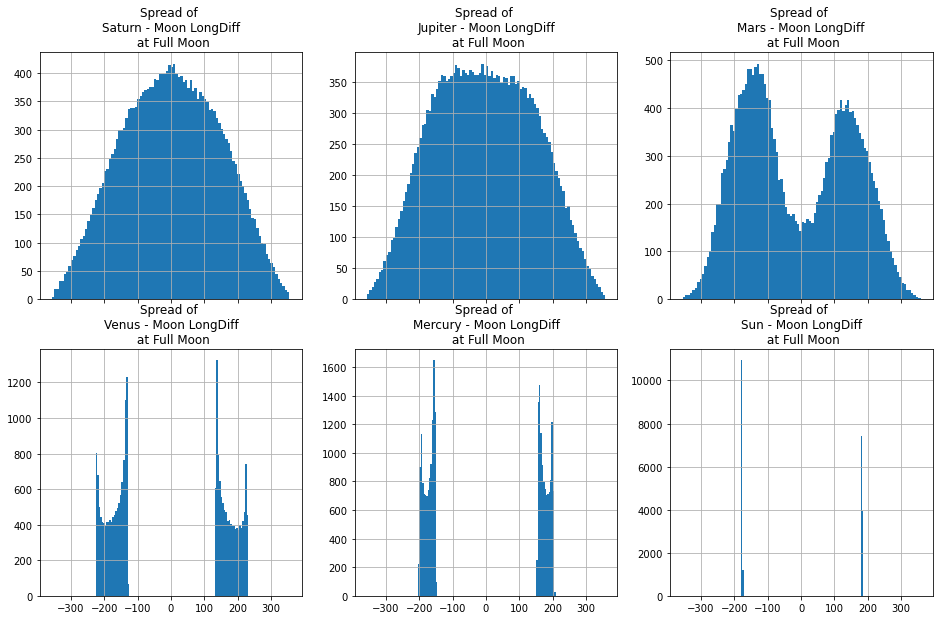

In [11]:
nmsu.plot_moon_gruha_long_diff_hist()

### Explore Relation of Full Moon to Maasa Names <a class="anchor" id="fm_mn"></a>  
[top](#top_)

- Count the frequency of super moons by nakshatra for a given series of epochs

- The epoch where nakshatras yielding maasa names have higher frequency is a candidate epoch for maasa names

- Couple of candidate epoch are shown below most nakshatra maasa have higher than mean super moons


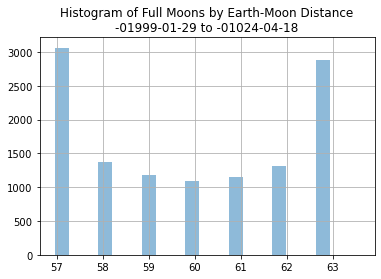

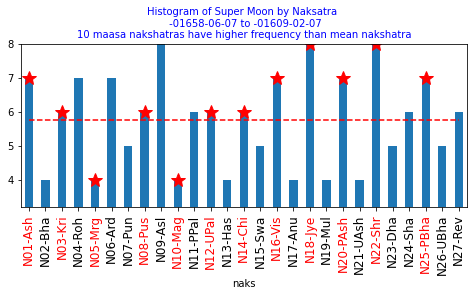

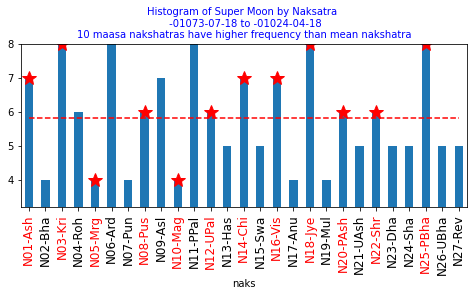

,date,step,mean_all_naks,mean_maasa_naks,mean_not_maasa_naks,num_maasas_above_mean_all,num_not_maasas_above_mean_all,match_metric
0,-01975,1,5.52,6.17,5.00,8,1,11.33
1,-01926,2,5.70,5.25,6.07,4,8,0.71
2,-01877,3,5.56,5.83,5.33,8,7,1.62
3,-01829,4,5.67,5.17,6.07,5,10,0.71
4,-01780,5,5.89,5.75,6.00,6,8,1.06
5,-01731,6,5.33,5.58,5.13,6,6,1.42
6,-01682,7,5.78,5.58,5.93,6,9,0.94
7,-01634,8,5.78,6.33,5.33,10,3,4.72
8,-01585,9,5.59,5.42,5.73,5,9,0.79
9,-01536,10,5.70,5.75,5.67,5,7,1.01


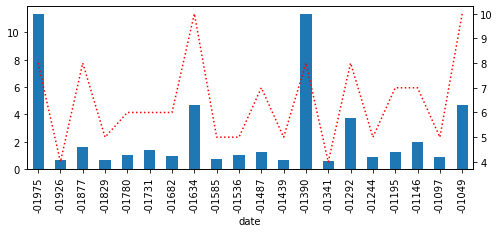

In [12]:
nmsu.super_moon_histogram_by_epoch()

### Mars and Moon Parvas <a class="anchor" id="Mars_and_Moon_Parvas"></a> 
[top](#top_)

In [13]:
# [12:18 PM, 11/11/2021] Anand Vedic Astronomy: 
# oru plot venum. not urgent
# every 3 pakshas position of Mars
#  1) Position (longitude) of Mars on an amaavaasyaa
#  2) Position of Mars 3 pakshas later, ie, on purnimaa
# 3) Position of Mars 3 pakshas later, ie, on Amaavaasyaa
# etc
# this is for periods of pro-grade motion
# This is to test a statement in Bhaagavatam that "Mars travels one raashi in 3 pakshas"
# I have roughly verified that this is true at least in some 3-paksha periods

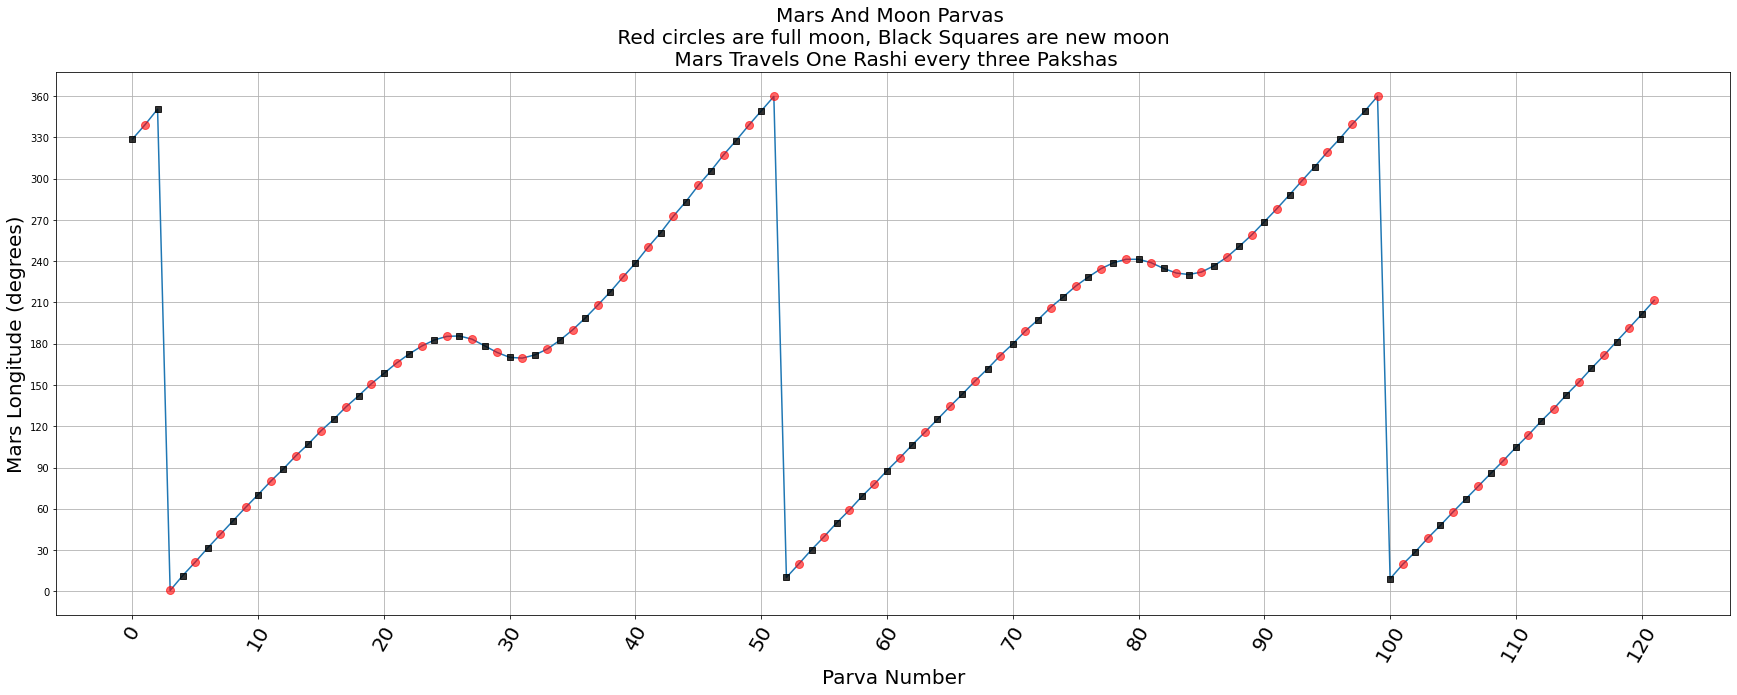

In [14]:
import PlanetPos
import pandas as pd
import numpy as np
import re
pp = PlanetPos.PlanetPos( slice= ['Moon', 'Sun' ,'Mars'])
jd_start = PlanetPos.JD_BCE_1000_JAN_1
nyears = 5
fn = f'mar_{nyears}~.pkl'
fn = f'../datasets/{fn}'
try :
	# 1/0
	mars_yrs = pd.read_pickle(fn)
except Exception as e:
	print(e)
	mars_yrs = pd.concat( [pp.get_planet_pos(jd) for jd in np.arange(jd_start, jd_start+366*nyears, 1/6)])#.plot(figsize=(20,10))
	mars_yrs.to_pickle(fn)

marspvt = mars_yrs.pivot_table(index=['jd', 'date'], columns='planet', values='elong').reset_index()#.set_index('jd')#.plot(figsize=(20,10))
marspvt.date = marspvt.date.apply(lambda x: re.sub(":\d\d\.\d\d\d","",x))
marspvt['moon_phase'] = (marspvt.Sun - marspvt.Moon)%360
marspvt['mars_direction'] = np.sign(marspvt.Mars.diff()).apply(lambda x: 1 if x == 1.0 else -1)
delta=1.1
fm = marspvt[ [ (180-delta)<x<(180+delta) for x in marspvt.moon_phase] ].jd.diff() 
nm = marspvt[marspvt.moon_phase < 2.2].jd.diff()
fm = fm[fm>1]
nm = nm[nm>1]
fm =-fm
nfm = fm.copy().append(nm).sort_index()
parvas = marspvt.loc[nfm.index]
parvas['moon_parva'] = [ int(x) for x in (-np.sign(nfm.values)+1)/2]
parvas['parva_diff'] = parvas.jd.diff()
parvas = parvas[parvas.mars_direction > -2].reset_index()
pd.options.display.float_format = '{:.2f}'.format
ax=parvas.Mars.plot(figsize=(30,10))
parvas[parvas.moon_parva == 1].Mars.plot(ax=ax, marker='o', markersize=8, color='red', alpha=0.6, lw=0)
parvas[parvas.moon_parva != 1].Mars.plot(ax=ax, marker='s', color='black', alpha=0.8, lw=0)

ax.set_title('Mars And Moon Parvas \n Red circles are full moon, Black Squares are new moon \n Mars Travels One Rashi every three Pakshas', fontdict={'fontsize':20})
ax.set_xlabel('Parva Number', fontdict={'fontsize':20})
ax.set_ylabel('Mars Longitude (degrees)',fontdict={'fontsize':20})
ax.set_xticks(np.arange(0,parvas.shape[0],10))
ax.set_xticklabels(np.arange(0,parvas.shape[0],10), rotation=60, fontsize=20)
ax.set_yticks(np.arange(0,361,30))
ax.grid(True)




### Nakshatras Meta Data <a class="anchor" id="Nakshatras_Meta_Data"></a> 
[top](#top_)

In [15]:
save_col = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', None)
display(nu.df28)
pd.set_option('display.max_columns', save_col)

,nnid,nid,naks,enaks,daivata,marga,veethi,shape,vgj_cnt,vgj_stars,proxy,sname,hip,abh_stars,lon,span,lon_ue,span_ue,scp_muhurta,scp_ahoratra,scp_lon_left,scp_lon_right
0,1,N01-Ash,अश्विनी,Aśvayuk,Aśvini,Madhyama,Go,Horseneck,3,"(α,β,γ) Ari",β Ari,Sheratan,HIP 8903,β Ari,0.00,13.33,0.00,13.33,30.00,13.40,1.99,15.17
1,2,N02-Bha,भरणी,Bharaṇī,Yama,Uttara,Naga,Bhaga (Perineum),3,"(35,39,41) Ari",* 41 Ari,Bharani,HIP 13209,41 Ari,13.33,13.34,13.33,6.67,15.00,6.70,15.17,21.76
2,3,N03-Kri,क्रित्तिका,Kṛttikā,Agni,Uttara,Naga,Knife/Cleaver,6,"(17,19,20,23,27,η) Tau",η Tau,Alcyone,HIP 17702,η Tau,26.67,13.33,20.00,13.33,30.00,13.40,21.76,34.94
3,4,N04-Roh,रोहिणी,Rohiṇī,Prajāpati,Uttara,Gaja,Cart,5,"(α,γ,λ) Ori",α Tau,Aldebaran,HIP 21421,α Tau,40.00,13.33,33.33,20.00,45.00,20.10,34.94,54.71
4,5,N05-Mrg,मृगशीर्ष,Mṛgaśira,Soma,Uttara,Gaja,Deer’s Head,3,(γ) Gem,λ Ori,Meissa(Heka),HIP 26207,λ Ori,53.33,13.34,53.33,13.33,30.00,13.40,54.71,67.89
5,6,N06-Ard,आर्द्रा,Ārdrā,Rudra,Uttara,Gaja,Bāhuḥ (Arm)/Red Dot,1,"(α,γ,δ1,ε,θ2) Tau",γ Gem,Alhena(Almeisan),HIP 31681,γ Gem,66.67,13.33,66.67,6.67,15.00,6.70,67.89,74.48
6,7,N07-Pun,पुनर्वसू,Punarvasu,Aditi,Uttara,Airavati,Balance,2,"(α,β) Gem",β Gem,Pollux,HIP 37826,β Gem,80.00,13.33,73.33,20.00,45.00,20.10,74.48,94.25
7,8,N08-Pus,पुष्य,Puṣya,Bṛhaspati,Uttara,Airavati,Śarāva (Pot-lid),1,(δ) Cnc,δ Cnc,Asellus Australis,HIP 42911,δ Cnc,93.33,13.34,93.33,13.33,30.00,13.40,94.25,107.43
8,9,N09-Asl,आश्लेषा,Āśleṣā,Sarpa,Uttara,Airavati,Snake Head/Flag,6,"(δ,ε,ζ,η,ρ,σ) Hya",ζ Hya,Minazal V,HIP 43813,ζ Hya,106.67,13.33,106.67,6.67,15.00,6.70,107.43,114.02
9,10,N10-Mag,मघा,Maghā,Pitṛ,Uttara,Airavati,Enclosure,6,"(α,γ1,ε,ζ,η,μ) Leo",ζ Leo,Adhafera,HIP 50335,α Leo,120.00,13.33,113.33,13.33,30.00,13.40,114.02,127.20


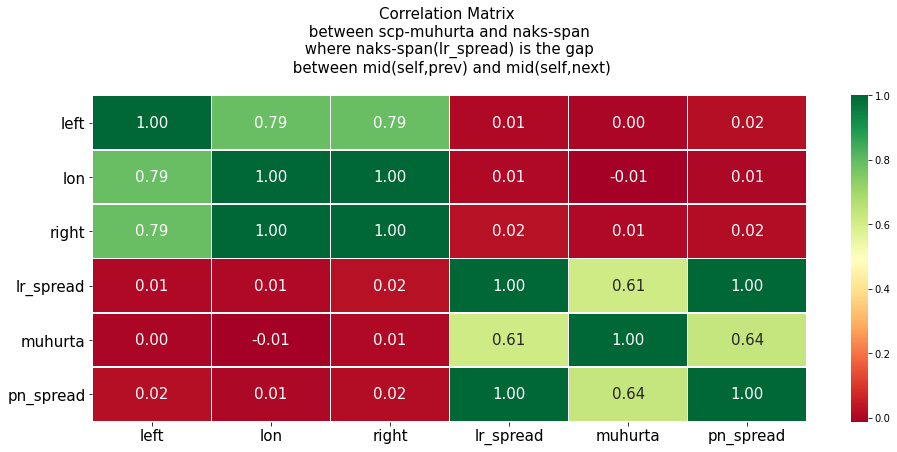

In [16]:
scp_df_ = nu.df28[ ['nid', 'proxy' , 'scp_muhurta', 'scp_lon_left'] ].rename(columns={'scp_lon_left':'lon', 'scp_muhurta':'muhurta'})
df_ = pd.DataFrame([ (pd.Series([i-1,i+1])%scp_df_.shape[0]).apply(lambda x: scp_df_.lon[x]).tolist()   for i,v in enumerate(scp_df_.lon) ], columns=["prev_lon","next_lon"])
scp_df_ = scp_df_.join(df_).assign (
	left = lambda x: (x.prev_lon+x.lon + x.lon.apply(lambda y: 360 if y == x.lon.min() else 0 ))/2,
	right = lambda x: (x.next_lon+x.lon + x.next_lon.apply(lambda y: 360 if y == x.lon.min() else 0 ))/2,
	pn_spread = lambda x: ((x.next_lon-x.prev_lon)%360)//2, # pn - prev to next - not too useful
	sn_spread = lambda x: (x.next_lon-x.lon)%360, # sn = self next 100% correlation as lon is derived from muhurta staring from chitra
	lr_spread = lambda x: (x.right - x.left)%360,
)
# scp_df['spread'] = (scp_df.next_lon - scp_df.prev_lon)%360
# scp_df = scp_df[['nid','proxy','prev_lon', 'next_lon','left', 'lon', 'right','pn_spread','lr_spread', 'muhurta']]
scp_df = scp_df_[['nid','proxy','left', 'lon', 'right', 'lr_spread', 'muhurta', 'pn_spread']]
scp_df.sort_values(by=['muhurta', 'nid'], inplace=True)
# pd.concat([scp_df, pd.DataFrame([''], columns=['<-NIDSort   |    MuhurtaSort ->']), scp_df.reset_index()], axis=1).fillna(('   ')).drop(columns=['index'])
xdf = pd.concat([scp_df, scp_df.reset_index()], axis=1).fillna(('   ')).drop(columns=['index'])
xdf.columns = pd.MultiIndex.from_product([['NIDSort', 'MuhurtaSort'], scp_df.columns.tolist(), ])	
# slice_ = ['MuhurtaSort', ['nid', 'proxy', 'left', 'lon', 'right', 'lr_spread', 'muhurta']]

# visualize covariance matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,6))
# sns.heatmap(cov_mat, xticklabels=scp_df.muhurta.unique(), yticklabels=scp_df.muhurta.unique(), cmap='RdYlGn_r')
ax = sns.heatmap(scp_df.corr(), cmap='RdYlGn', annot=True, annot_kws={"size": 15}, fmt='.2f', linewidths=0.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=20-5);
ax.set_title('Correlation Matrix \n between scp-muhurta and naks-span \n where naks-span(lr_spread) is the gap \n between mid(self,prev) and mid(self,next)\n', fontdict={'fontsize':15})
plt.show()

xdf.style.set_caption("<h2>Nakshatras sorted  - by NaturalOrder and by MuhurtaSpan<h2>")\
	.set_precision(2)\
	.background_gradient( cmap='RdYlGn', subset=[('MuhurtaSort', 'lr_spread'), ('MuhurtaSort', 'pn_spread'), ('MuhurtaSort','muhurta')] )


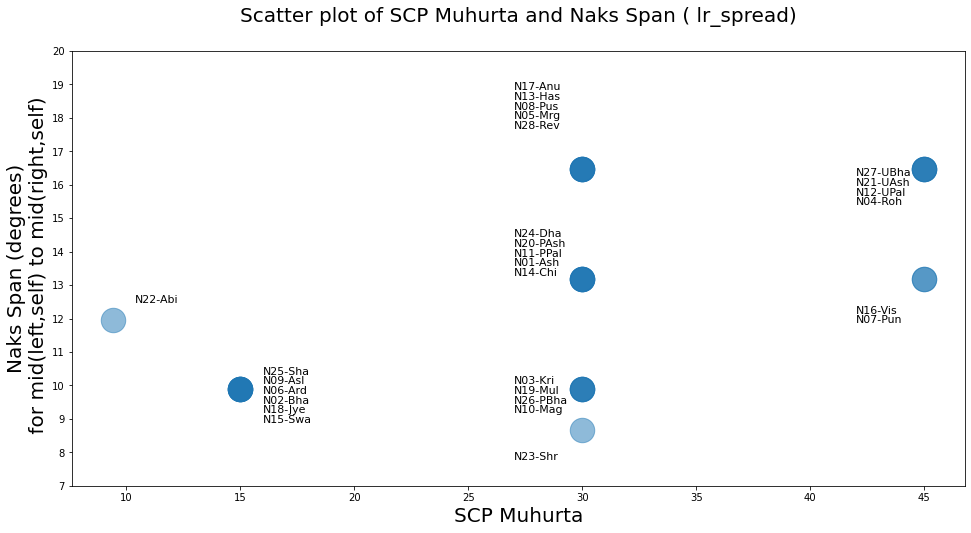

In [17]:
scp_df = scp_df.assign (
	# pn_ = lambda x: x.pn_spread + [ 1*np.random.randint(-1000,1000)/500.0 for i in range(x.shape[0])],
	lr_spread_ = lambda x: x.lr_spread + [1*np.random.randint(-200,200)/200.0 for i in range(x.shape[0])],
	muhurta_ = lambda x: x.muhurta + [0*np.random.randint(-1000,1000)/500.0 for i in range(x.shape[0])],
)

ax = scp_df.plot.scatter(
	x='muhurta', y='lr_spread', figsize=(16,8), s=600, alpha=0.5,
)

for idx, row in scp_df[scp_df.muhurta<30].sort_values(by=['lr_spread'], ascending=[not False]).reset_index().iterrows():
    ax.annotate(row['nid'], (row['muhurta_']+1, idx/3.5+ .9*row['lr_spread']), fontsize=11)

for idx, row in scp_df[scp_df.muhurta==30].sort_values(by=['lr_spread'], ascending=[not False]).reset_index().iterrows():
    ax.annotate(row['nid'] , (row['muhurta_']-3, idx/3.5+ .9*row['lr_spread']), fontsize=11)

for idx, row in scp_df[scp_df.muhurta==45].sort_values(by=['lr_spread'], ascending=[not False]).reset_index().iterrows():
    ax.annotate(row['nid'], (row['muhurta_']-3, idx/3.5+ .9*row['lr_spread']), fontsize=11)

ax.set_title("Scatter plot of SCP Muhurta and Naks Span ( lr_spread)\n", fontdict={'fontsize':20})
ax.set_xlabel('SCP Muhurta', fontdict={'fontsize':20})
ax.set_ylabel('Naks Span (degrees)\n for mid(left,self) to mid(right,self)', fontdict={'fontsize':20})
ax.set_yticks(np.arange(7,21,1));


### Moon Dwell Time by Nakshatra-Mid Span <a class="anchor" id="Moon_Dwell_Time_by_Nakshatra_Mid_Span"/>
[top](#top_)

In [18]:
def get_mdf_boundary_cross(mdf, scp_df, wrt='left', head=None):
	FN = f'../datasets/mdf_boundary_cross_wrt_{wrt}.csv' 
	if head:
		mdf = mdf.head(head)
		FN = f'../datasets/mdf_boundary_cross_wrt_{wrt}_head_{head}~.csv'
	try :
		ans = pd.read_csv(FN)
		return ans
	except Exception as e:
		print(f" Unable to load {FN}. Creating it now.\nError: {e}")
		blon = scp_df.loc[:,wrt] #.append(scp_df.right).reset_index(drop=True).apply(lambda x: round(x,1)).unique() #boundary_lon
		# Get the difference between moon long and the closest boundary longitude
		mdf_boundary_cross = pd.DataFrame(mdf.apply(lambda x: pd.Series([ 
			abs(blon-x.elong_Moon).idxmin(), # left_boundary_idx
			x.elong_Moon,
			x.sun_moon_angle,	
			]), axis=1))
		mdf_boundary_cross.columns = ['idx', 'elong_Moon', 'sun_moon_angle']
		mdf_boundary_cross.reset_index(inplace=True)
		mdf_boundary_cross = mdf_boundary_cross.join(scp_df, on='idx', rsuffix='_scp')

		# find how far the moon is from the left boundary
		mdf_boundary_cross = mdf_boundary_cross.assign( 
			diff1 = abs(mdf_boundary_cross.loc[:,wrt] - mdf_boundary_cross.elong_Moon),
		)
		# Differenitate diff1 - to find when moon crosses a boundary longitude - the sign of diff1 changes , diff2 will be 2 after crossing a boundary longitude
		mdf_boundary_cross['diff2'] = mdf_boundary_cross.diff1.diff().apply(lambda x: np.sign(x)).diff()
		mdf_boundary_cross['cross'] = None

		# Diff2 find the points after the min, this hack marks the actual min with magic number 11
		mdf_boundary_cross=mdf_boundary_cross.reset_index()
		mdf_boundary_cross.loc[mdf_boundary_cross[mdf_boundary_cross.diff2==2].index -1, 'cross'] = 'left'
		mdf_boundary_cross = mdf_boundary_cross[mdf_boundary_cross.cross=='left'].set_index('jd').reset_index().drop(columns=['index', 'idx'])
		mdf_boundary_cross['dwell_time'] = -mdf_boundary_cross.jd.diff(periods=-1)
		mdf_boundary_cross.dropna(inplace=True)
		print(f"Saving {FN}")
		mdf_boundary_cross.to_csv(FN, index=False)
		return mdf_boundary_cross

if 'elong_Moon_saved' not in mdf_interpolated.columns:
	mdf_interpolated['elong_Moon_saved'] = mdf_interpolated.elong_Moon

mdf_interpolated.elong_Moon = mdf_interpolated.elong_Moon_saved.apply(lambda x: round(x,1))
mdf_boundary_cross = get_mdf_boundary_cross(mdf_interpolated, 
	scp_df_.sort_index().reset_index().rename(columns={'index':'idx'}), wrt='left', head=None)

mdf_boundary_cross.head(30).style.set_caption(
	f"<h2>Moon Dwell Time in days - first 30 of {mdf_boundary_cross.shape[0]} visit instances <h2>\n<h4>dwell time is between left and right mid of self and prev/next</h4>"
	f'<a href="https://raw.githubusercontent.com/suchakr/cahc-utils/sunder_experiments/datasets/mdf_boundary_cross.csv">Download Full {mdf_boundary_cross.shape[0]} rows csv </a><hr>'
	) \
	.set_precision(2)\
	.background_gradient( cmap='RdYlGn', subset=['dwell_time'] )


,jd,elong_Moon,sun_moon_angle,idx_scp,nid,proxy,muhurta,lon,prev_lon,next_lon,left,right,pn_spread,lr_spread,diff1,diff2,cross,dwell_time
0,1355818.00,281.10,0.50,22,N23-Shr,α Aql,30.00,282.90,278.77,296.08,280.84,289.49,17.31,8.66,0.26,0.00,left,0.67
1,1355818.67,289.40,352.90,23,N24-Dha,β Del,30.00,296.08,282.90,309.26,289.49,302.67,26.36,13.18,0.09,0.00,left,1.06
2,1355819.72,302.60,340.71,24,N25-Sha,λ Aqr,15.00,309.26,296.08,315.85,302.67,312.56,19.77,9.89,0.07,0.00,left,0.78
3,1355820.50,312.50,331.60,25,N26-PBha,α Peg,30.00,315.85,309.26,329.03,312.56,322.44,19.77,9.89,0.06,0.00,left,0.78
4,1355821.28,322.50,322.40,26,N27-UBha,λ Peg,45.00,329.03,315.85,348.81,322.44,338.92,32.95,16.48,0.06,0.00,left,1.28
5,1355822.56,339.20,307.04,27,N28-Rev,ε Psc,30.00,348.81,329.03,1.99,338.92,355.40,32.95,16.48,0.28,0.00,left,1.22
6,1355823.78,355.40,292.06,0,N01-Ash,β Ari,30.00,1.99,348.81,15.17,355.40,8.58,26.36,13.18,0.00,0.00,left,1.00
7,1355824.78,8.90,279.54,1,N02-Bha,* 41 Ari,15.00,15.17,1.99,21.76,8.58,18.46,19.77,9.89,0.32,0.00,left,0.72
8,1355825.50,18.80,270.34,2,N03-Kri,η Tau,30.00,21.76,15.17,34.94,18.46,28.35,19.77,9.89,0.34,0.00,left,0.67
9,1355826.17,28.10,261.71,3,N04-Roh,α Tau,45.00,34.94,21.76,54.71,28.35,44.82,32.95,16.48,0.25,0.00,left,1.17


,dwell_mean,dwell_std,scp_muhurta
dwell_mean,1.00,0.99,0.64
dwell_std,0.99,1.00,0.63
scp_muhurta,0.64,0.63,1.00


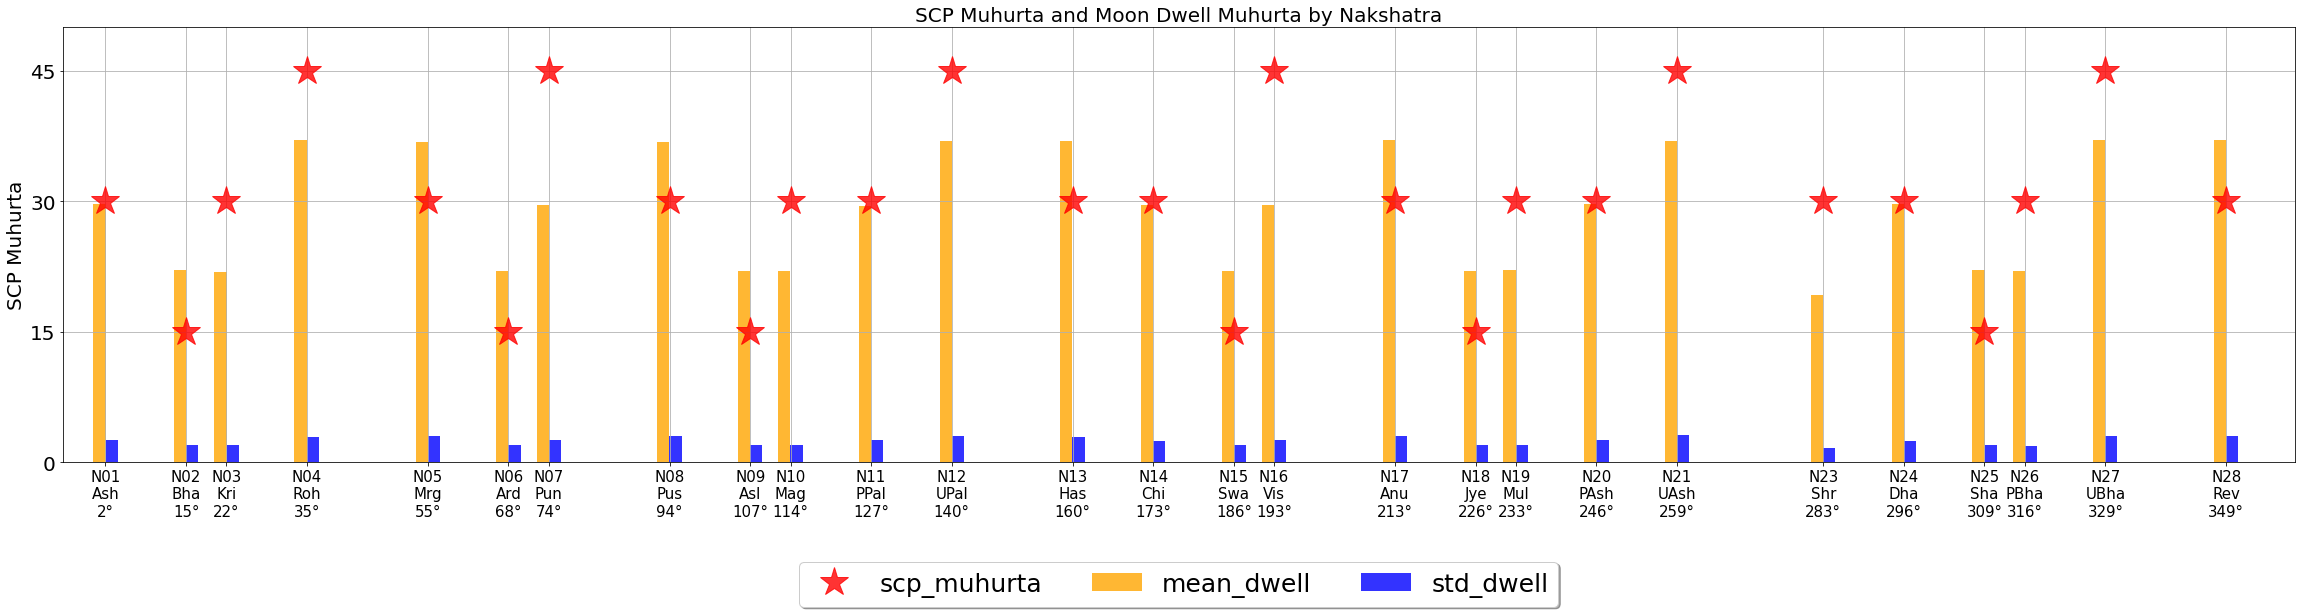

In [205]:
# mode of a series
def mode_(x): return x.value_counts().idxmax()

pvt0_ = mdf_boundary_cross.assign(dwell_muhurta = lambda x: (30*x.dwell_time).apply(int)).pivot_table(
	index=['nid','lon'], values='dwell_muhurta', aggfunc=['mean', mode_ , 'std', min, max, 'count'])
pvt0_.columns = [x[0] if len(x)>1 else x[0] for x in pvt0_.columns]

pvt1_ = mdf_boundary_cross.pivot_table(index=['nid','lon'], values='muhurta', aggfunc=[min])
pvt1_.columns = ['muhurta']

pvt_ = pvt0_.join(pvt1_).reset_index()
pvt_ = pvt_.set_index('nid').drop(index='N22-Abi').reset_index()
pvt_['lon_'] = pvt_.lon.apply(lambda x: round(x,1))
pvt_ = pvt_.set_index('lon')

ax_ = pvt_.plot(figsize=(40,8), kind="line", lw=0, marker='*', markersize=30, alpha=0.8 , y='muhurta', color='red')
plt.bar(pvt_.lon_.values-1 , pvt_['mean'], alpha=0.8, color='orange', width=2)
# plt.bar(pvt_.lon_.values, pvt_['mean'], alpha=0.8, color='orange')
plt.bar(pvt_.lon_.values+1, pvt_['std'], alpha=0.8, color='blue', width=2)

ax_.set_xlim(-5,360)
ax_.set_xticks(pvt_.index)
ax_.set_xlabel('', fontdict={'fontsize':2})
ax_.set_xticklabels(pvt_.apply( lambda x: re.sub("\\-","\\n", x.nid)+"\n" + f"{x.lon_:.0f}°" , axis=1), rotation=0, fontdict={'fontsize':15});

ax_.set_ylim(0,50)
ax_.set_yticks([0,15,30,45])
ax_.set_ylabel('SCP Muhurta', fontdict={'fontsize':20})
ax_.set_yticklabels([0,15,30,45], fontdict={'fontsize':20});
ax_.legend(['scp_muhurta', 'mean_dwell', 'std_dwell'], loc='upper center', bbox_to_anchor=(.5, -.2), ncol=5, fancybox=True, shadow=True, fontsize=25)
ax_.set_title("SCP Muhurta and Moon Dwell Muhurta by Nakshatra", fontdict={'fontsize':20})
ax_.grid(True)
# pvt_ = pvt_.reset_index()
# pvt_.index = pvt_.lon

corr=pvt_[['mean', 'std', 'muhurta']].rename(columns={'mean': 'dwell_mean', 'std' : 'dwell_std', 'muhurta' : 'scp_muhurta'}).corr()
heading_properties = [('font-size', '20px')]
cell_properties = [('font-size', '22px')]
dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]
corr.style.set_table_styles(dfstyle) \
 .background_gradient(cmap='RdYlGn').set_precision(2).set_caption("<h2>Correlation of SCP muhurta with Moon Dwell Muhurta - mean,std</h2>")


In [214]:
pvt_.reset_index()[['nid', 'muhurta', 'lon', 'mean', 'std']].rename( columns = {'nid':'nakshatra', 'lon':'lon', 'muhurta':'scp_muhurta', 'mean':'dwell_mean', 'std':'dwell_std'} ).style.background_gradient(cmap='RdYlGn', subset=['scp_muhurta', 'dwell_mean', 'dwell_std']).set_precision(1).set_caption("<h2>SCP Muhurta and Moon Dwell Muhurta by Nakshatra</h2>")

,nakshatra,scp_muhurta,lon,dwell_mean,dwell_std
0,N01-Ash,30.0,2.0,29.7,2.6
1,N02-Bha,15.0,15.2,22.1,2.0
2,N03-Kri,30.0,21.8,21.9,1.9
3,N04-Roh,45.0,34.9,37.0,3.0
4,N05-Mrg,30.0,54.7,36.9,3.0
5,N06-Ard,15.0,67.9,22.0,2.0
6,N07-Pun,45.0,74.5,29.6,2.5
7,N08-Pus,30.0,94.2,36.8,3.0
8,N09-Asl,15.0,107.4,22.0,2.0
9,N10-Mag,30.0,114.0,22.0,2.0


,mean,mode_,std,min,max,count,muhurta,lon_
mean,1.00,0.99,0.99,1.00,1.00,-0.24,0.64,0.03
mode_,0.99,1.00,0.98,0.99,0.99,-0.24,0.60,0.05
std,0.99,0.98,1.00,0.99,0.99,-0.27,0.63,0.02
min,1.00,0.99,0.99,1.00,1.00,-0.25,0.63,0.03
max,1.00,0.99,0.99,1.00,1.00,-0.24,0.64,0.03
count,-0.24,-0.24,-0.27,-0.25,-0.24,1.00,-0.29,-0.17
muhurta,0.64,0.60,0.63,0.63,0.64,-0.29,1.00,0.06
lon_,0.03,0.05,0.02,0.03,0.03,-0.17,0.06,1.00


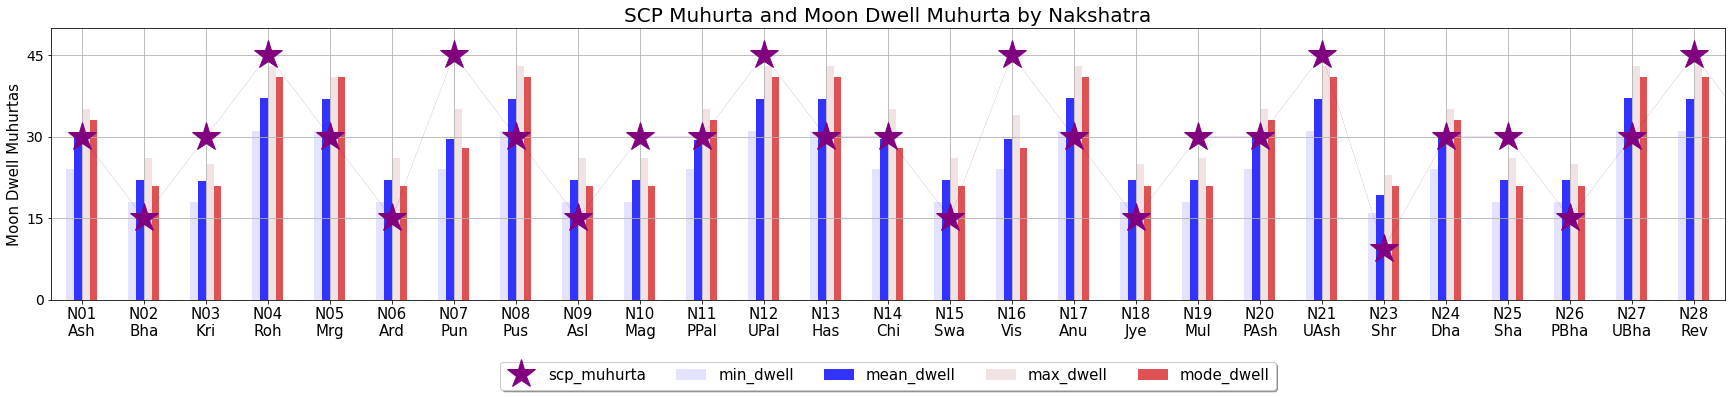

In [193]:
ax = pvt_.reset_index().plot(kind='bar', stacked=not True, figsize=(30,5), alpha=0.8, grid=True , x='lon', y=['min', 'mean', 'max', 'mode_'],
	color=['#ddddff', '#0000FF', '#eedddd', '#d62728'],
	)
ax = mdf_boundary_cross.pivot_table(index='nid', values='muhurta', aggfunc=['mean']).plot(kind='line', marker='*', markersize=30, ls=':', lw=.3, figsize=(30,5), color='purple', ax=ax, grid=True)
ax.legend(['scp_muhurta', 'min_dwell', 'mean_dwell', 'max_dwell', 'mode_dwell'], loc='upper center', bbox_to_anchor=(.5, -.2), ncol=5, fancybox=True, shadow=True, fontsize=15)
ax.set_title("SCP Muhurta and Moon Dwell Muhurta by Nakshatra", fontdict={'fontsize':20})
ax.set_xlabel('', fontdict={'fontsize':2})
ax.set_ylabel('Moon Dwell Muhurtas', fontdict={'fontsize':15})
# ax.set_xticks(mdf_boundary_cross.loc[:28].sort_values('nid').lon)
# ax.set_xticklabels( [ re.sub("\-","\n", l.get_text()) for l in ax.get_xticklabels()], rotation=90, fontdict={'fontsize':12}) ;
ax.set_xticklabels( [ re.sub("\-","\n", l) for l in pvt_.nid], rotation=0, fontdict={'fontsize':15})
# ax.set_yticklabels([ int(x) for x in ax.get_yticks()], fontdict={'fontsize':14})
ax.set_yticks([0,15,30,45])
ax.set_yticklabels([ int(x) for x in [0,15,30,45] ], fontdict={'fontsize':14})
ax.set_ylim(0,50)
# ax.set_xlim(0,360)
ax.facecolor = 'yellow'

# collapse the multi  level column index into a single level
# pvt_.columns = [x[0] if len(x)>1 else x[0] for x in pvt_.columns]
# pvt_ = pvt_.set_index('nid').join(scp_df_.set_index('nid')[['muhurta']], on='nid') 
pvt_.corr().style.background_gradient(cmap='RdYlGn').set_precision(2).set_caption("<h2>Correlation of SCP muhurta with Moon Dwell Muhurta - min,mean,max,mode</h2>")

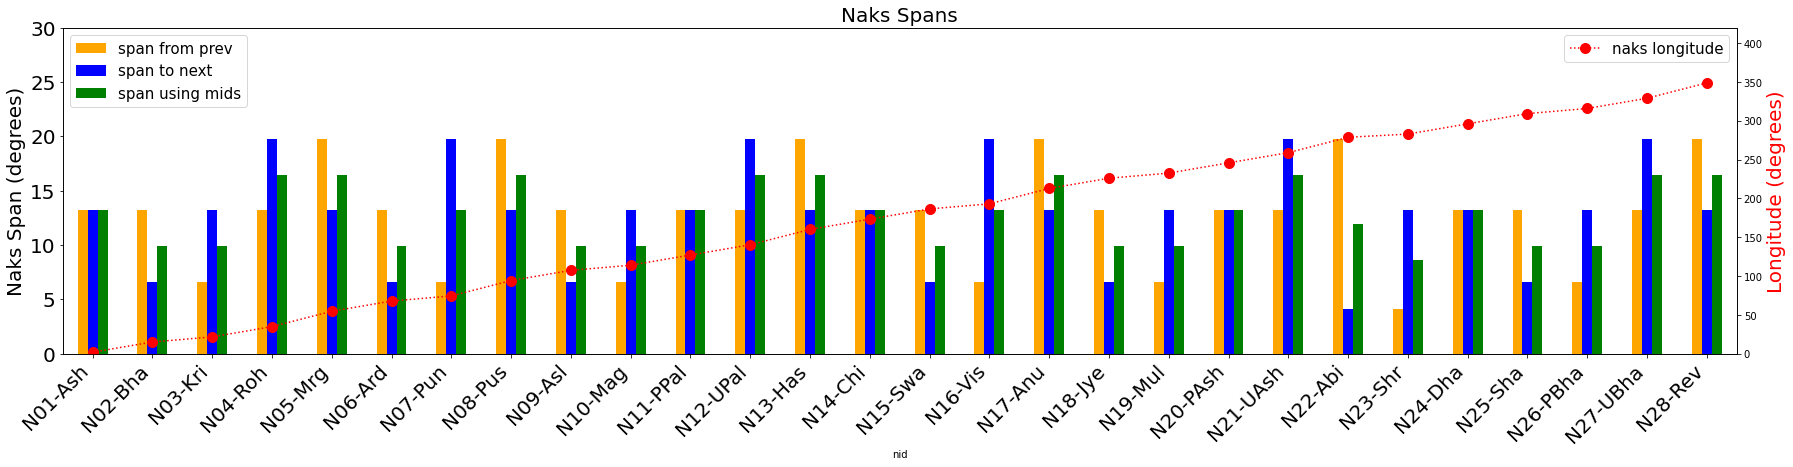

In [35]:
m28 = mdf_boundary_cross.head(28).sort_values(by=['nid'], ascending=not False)
m28['ps_spread'] = (m28.lon-m28.prev_lon)%360
m28['ns_spread'] = (-m28.lon+m28.next_lon)%360
# m28[[ 'nid', 'lon', 'ps_spread','ns_spread', 'lr_spread']].style.background_gradient( cmap='RdYlGn', subset=['ps_spread','ns_spread', 'lr_spread'] )
ax=m28[[ 'nid', 'ps_spread', 'ns_spread','lr_spread']].set_index('nid').plot.bar(figsize=(30,6), color=['orange', 'blue', 'green'], legend='upper center', rot=0, fontsize=20)
m28[[ 'nid', 'lon']].set_index('nid').plot(secondary_y=['lon'], color=['red'], marker='o', linestyle=':', markersize=10, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=20)
ax.set_ylabel('Naks Span (degrees)', fontdict={'fontsize':20})
ax.right_ax.set_ylabel('Longitude (degrees)', fontdict={'fontsize':20 , 'color':'red'})
ax.legend(['span from prev', 'span to next', 'span using mids'], loc='upper left', fontsize=15)
ax.right_ax.legend(['naks longitude'], loc='upper right',  fontsize=15)
ax.set_ylim([0,30])
ax.right_ax.set_ylim([0,420])
ax.set_title('Naks Spans', fontdict={'fontsize':20});
# ax.legend(loc='upper center', fontsize=20)
# m28[[ 'nid', 'lon', 'ps_spread', 'ns_spread','lr_spread']].style.bar( color='orange', subset=['ps_spread', 'ns_spread', 'lr_spread'] )#.background_gradient( cmap='RdYlGn', subset=['ps_spread', 'lr_spread'] 

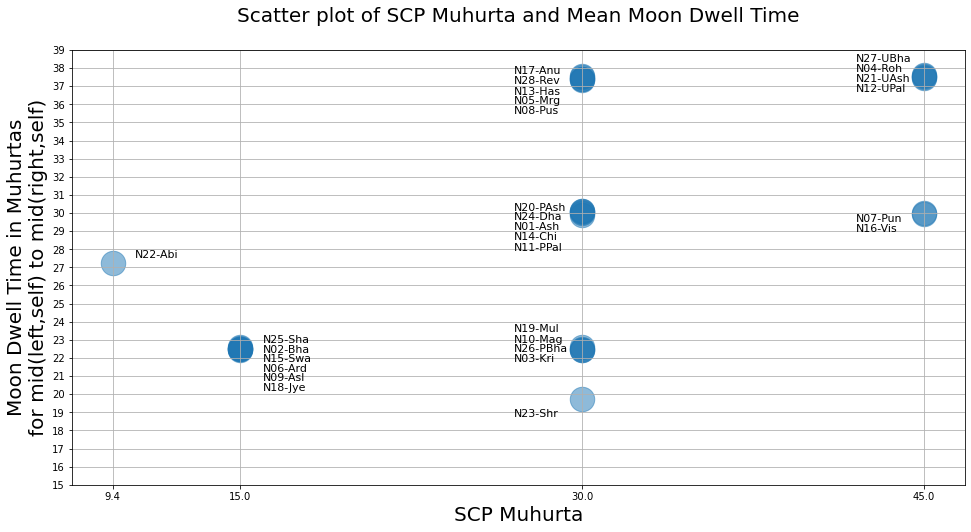

In [58]:
mdf_all = mdf_boundary_cross.pivot_table(index='nid', values=['dwell_time', 'muhurta'], aggfunc='mean').assign(
	dwell_time = lambda x: 30*x.dwell_time
)

mdf_fm = mdf_boundary_cross[].pivot_table(index='nid', values=['dwell_time', 'muhurta'], aggfunc='mean').assign(
	dwell_time = lambda x: 30*x.dwell_time
)

for mdf_ in [mdf_all]:
    ax = mdf_.plot.scatter(
        x='muhurta', y='dwell_time', figsize=(16,8), s=600, alpha=0.5, grid=True,
    )

    for idx, row in mdf_[mdf_.muhurta<30].sort_values(by=['dwell_time', 'nid'], ascending=[True,True]).reset_index().iterrows():
        ax.annotate(row['nid'], (row['muhurta']+1, idx/2+ .9*row['dwell_time']), fontsize=11)

    for idx, row in mdf_[mdf_.muhurta==30].sort_values(by=['dwell_time', 'nid'], ascending=[True,True]).reset_index().iterrows():
        ax.annotate(row['nid'] , (row['muhurta']-3, (-5 if idx> 9 else -3 if idx>4 else 0 )+idx/2+ .95*row['dwell_time']), fontsize=11)

    for idx, row in mdf_[mdf_.muhurta==45].sort_values(by=['dwell_time', 'nid'], ascending=[True,True]).reset_index().iterrows():
        ax.annotate(f"{row['nid']}", (row['muhurta']-3, 2+idx/2 + .9*row['dwell_time']), fontsize=11)

    ax.set_title("Scatter plot of SCP Muhurta and Mean Moon Dwell Time\n", fontdict={'fontsize':20})
    ax.set_xlabel('SCP Muhurta', fontdict={'fontsize':20})
    ax.set_ylabel('Moon Dwell Time in Muhurtas\nfor mid(left,self) to mid(right,self)', fontdict={'fontsize':20})
    ax.set_yticks(np.arange(15,40,1))
    ax.set_xticks([9+27/67,15,30,45]);


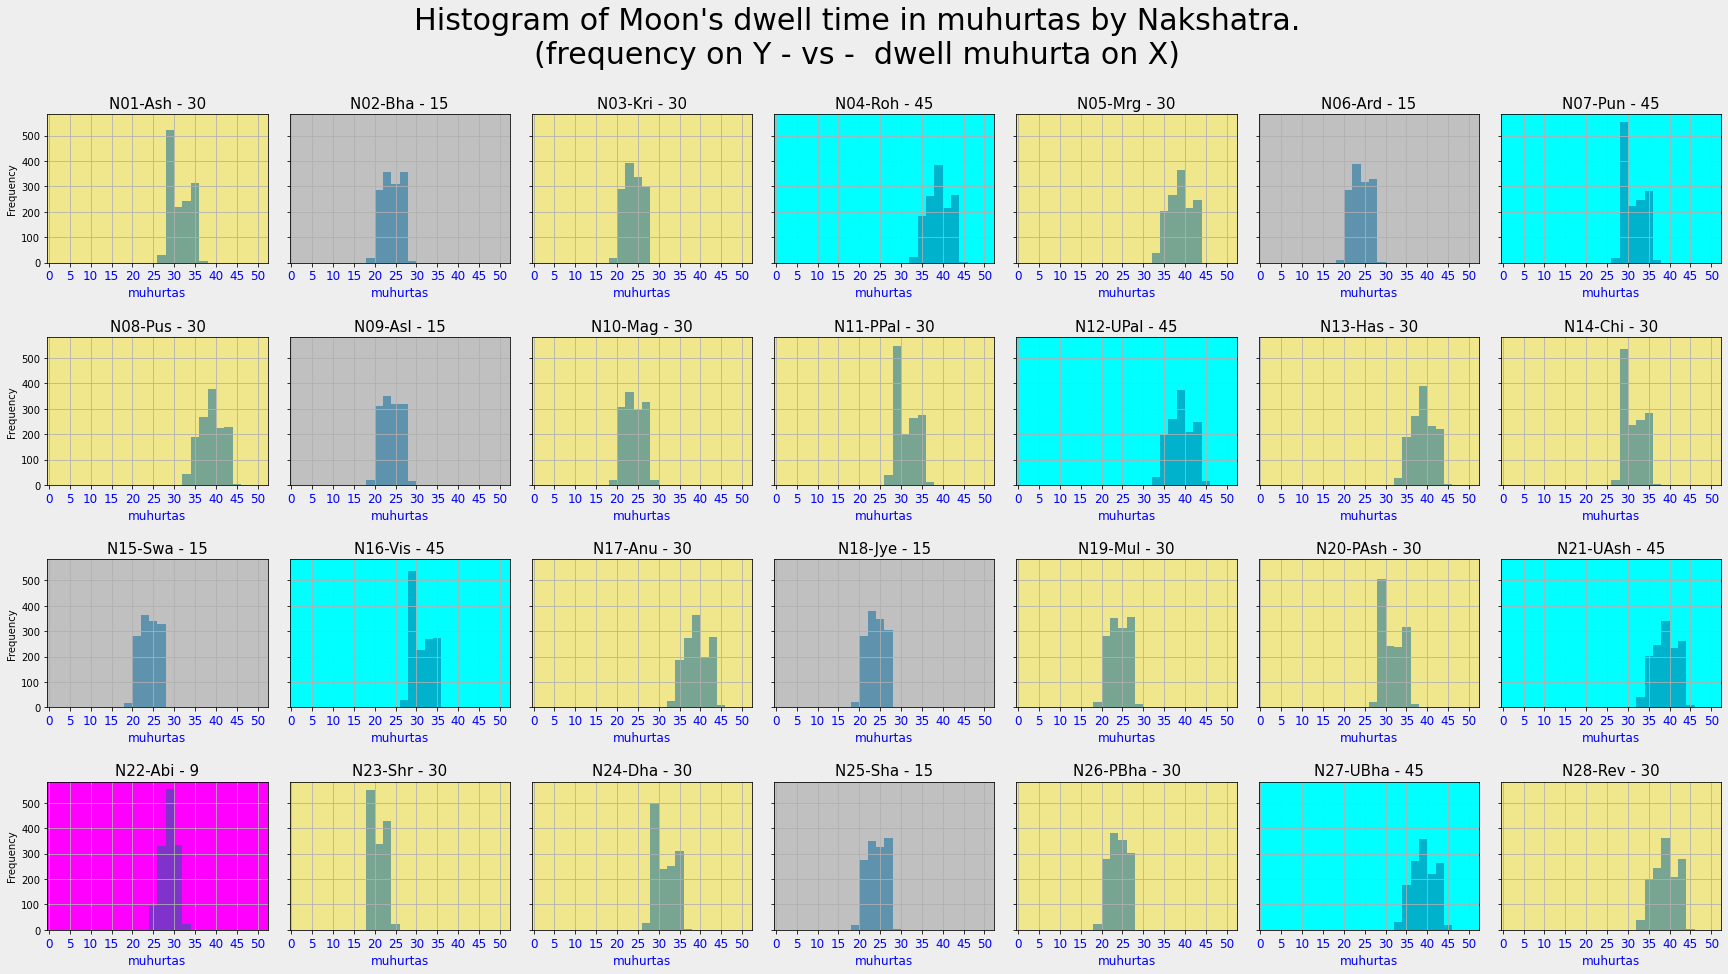

In [25]:
fig, axs = plt.subplots(4,7, figsize=(30,15), sharex=not True, sharey=True, gridspec_kw={'hspace': .5, 'wspace': .1})
axs = axs.flatten()
fig.suptitle(f"Histogram of Moon's dwell time in muhurtas by Nakshatra.\n(frequency on Y - vs -  dwell muhurta on X)", fontsize=30)
fig.set_facecolor('#EEEEEE')

for nid, df_ in mdf_boundary_cross.groupby('nid'):
	idx , muhurta = df_.iloc[0].idx_scp, int(df_.iloc[0].muhurta)
	# display(df_)
	df_['instance'] = range(1,len(df_)+1)
	df_['dwell_hours'] = df_.dwell_time.apply(lambda x: round(x*24,0))
	df_['dwell_muhurtas'] = df_.dwell_time.apply(lambda x: round(x*30,0))
	
	ax = df_[['dwell_muhurtas']].plot(kind='hist', bins=range(1,51,2), ax=axs[idx], alpha=0.5, grid=True, legend=False,  color='#006699',align='right')
	ax.set_title(f"{nid} - {int(muhurta)}" , fontdict={'fontsize':15})
	colors = {'45':'cyan', '30':'khaki', '15':'silver'}
	color = colors[str(muhurta)] if str(muhurta) in colors else  '#ff00ff' 
	ax.set_facecolor(color)
	ax.set_xlabel(f"muhurtas", fontdict={'fontsize':12, 'color':'blue'})
	ax.set_xticks(np.arange(0,51,5))
	ax.set_xticklabels(np.arange(0,51,5), fontdict={'fontsize':12, 'color':'blue'})


In [28]:
mdf_interpolated

,elati_Moon,elong_Moon,r_Moon,elong_Sun,sun_moon_angle,ts,elong_Moon_saved
jd,,,,,,,
1355817.50,4.99,275.00,62.77,281.12,6.15,0.00,274.97
1355817.56,4.99,275.60,62.74,281.17,5.52,0.06,275.65
1355817.61,4.99,276.30,62.72,281.23,4.90,0.11,276.33
1355817.67,4.99,277.00,62.69,281.28,4.27,0.17,277.01
1355817.72,4.99,277.70,62.66,281.34,3.64,0.22,277.70
...,...,...,...,...,...,...,...
1392317.06,-1.76,255.70,60.41,256.04,120.30,36499.56,255.74
1392317.11,-1.82,256.50,60.45,256.10,239.61,36499.61,256.48
1392317.17,-1.89,257.20,60.49,256.15,358.93,36499.67,257.22


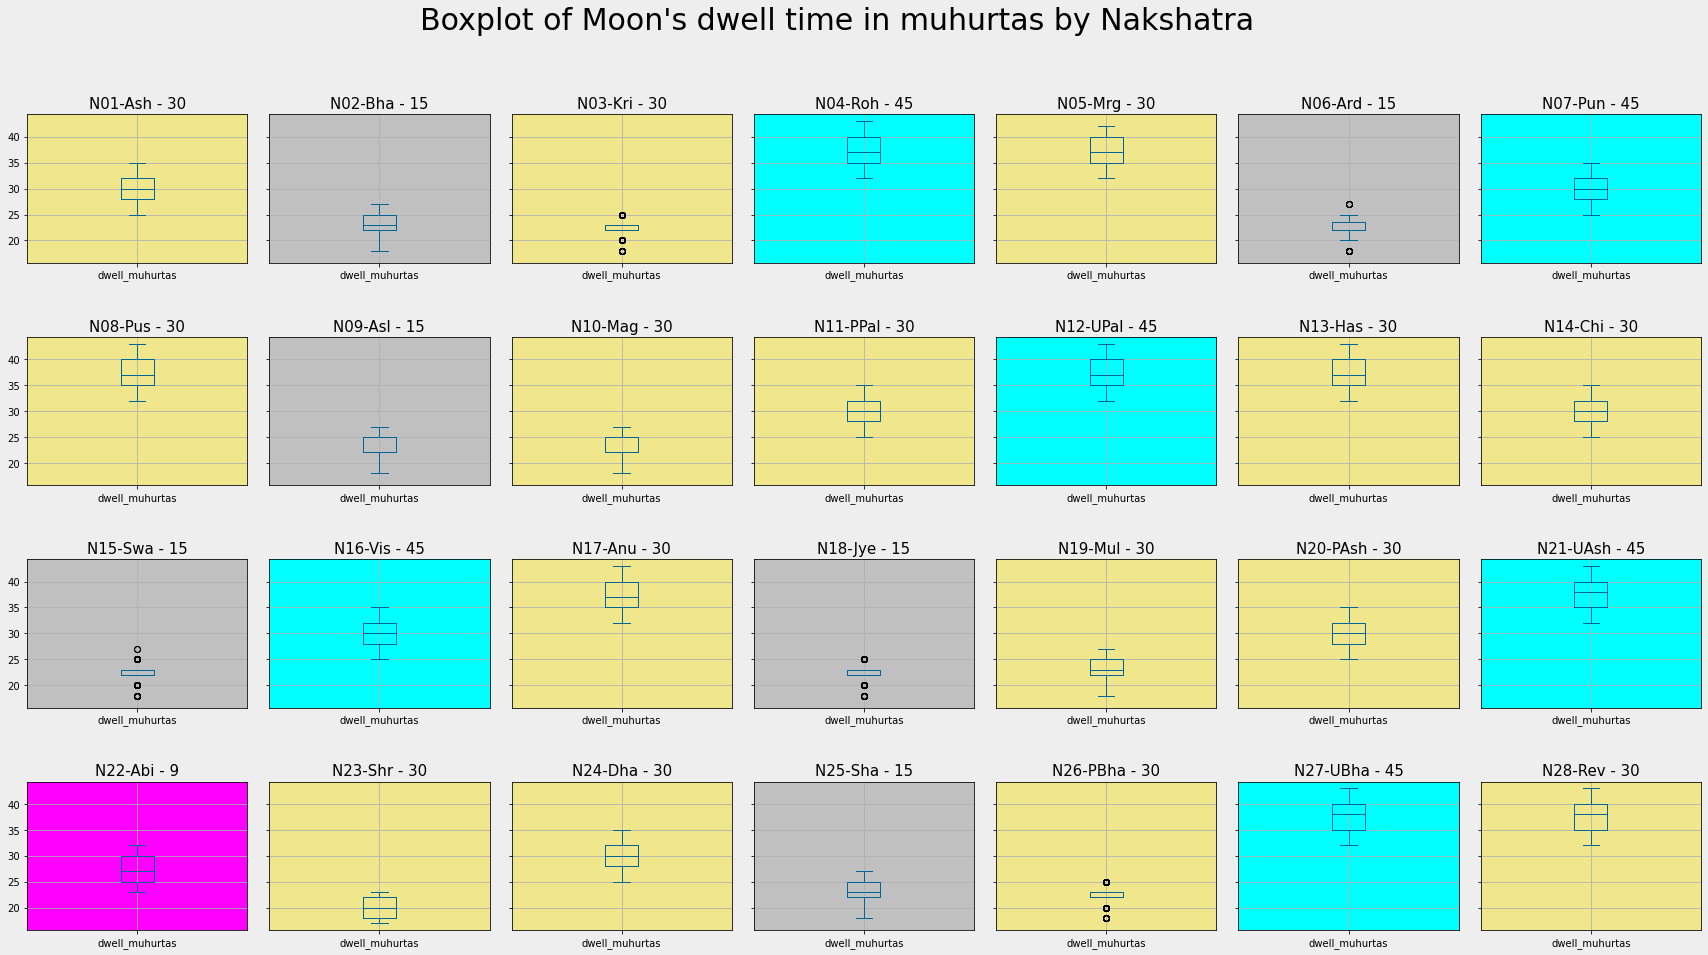

In [609]:
fig, axs = plt.subplots(4,7, figsize=(30,15), sharex=not True, sharey=True, gridspec_kw={'hspace': .5, 'wspace': .1})
axs = axs.flatten()
fig.suptitle(f"Boxplot of Moon's dwell time in muhurtas by Nakshatra", fontsize=30)
fig.set_facecolor('#EEEEEE')

for nid, df_ in mdf_boundary_cross.groupby('nid'):
	idx , muhurta = df_.iloc[0].idx_scp, int(df_.iloc[0].muhurta)
	# display(df_)
	df_['instance'] = range(1,len(df_)+1)
	df_['dwell_hours'] = df_.dwell_time.apply(lambda x: round(x*24,0))
	df_['dwell_muhurtas'] = df_.dwell_time.apply(lambda x: round(x*30,0))
	
	ax = df_[['dwell_muhurtas']].plot(kind='box',  ax=axs[idx], grid=True, legend=not False, color='#006699')
	ax.set_title(f"{nid} - {int(muhurta)}" , fontdict={'fontsize':15})
	colors = {'45':'cyan', '30':'khaki', '15':'silver'}
	color = colors[str(muhurta)] if str(muhurta) in colors else  '#ff00ff' 
	ax.set_facecolor(color)
	# ax.set_xlabel(f"", fontdict={'fontsize':12, 'color':'blue'})
	# ax.set_xticks(np.arange(0,51,5))
	# ax.set_xticklabels(np.arange(0,51,5), fontdict={'fontsize':12, 'color':'blue'})


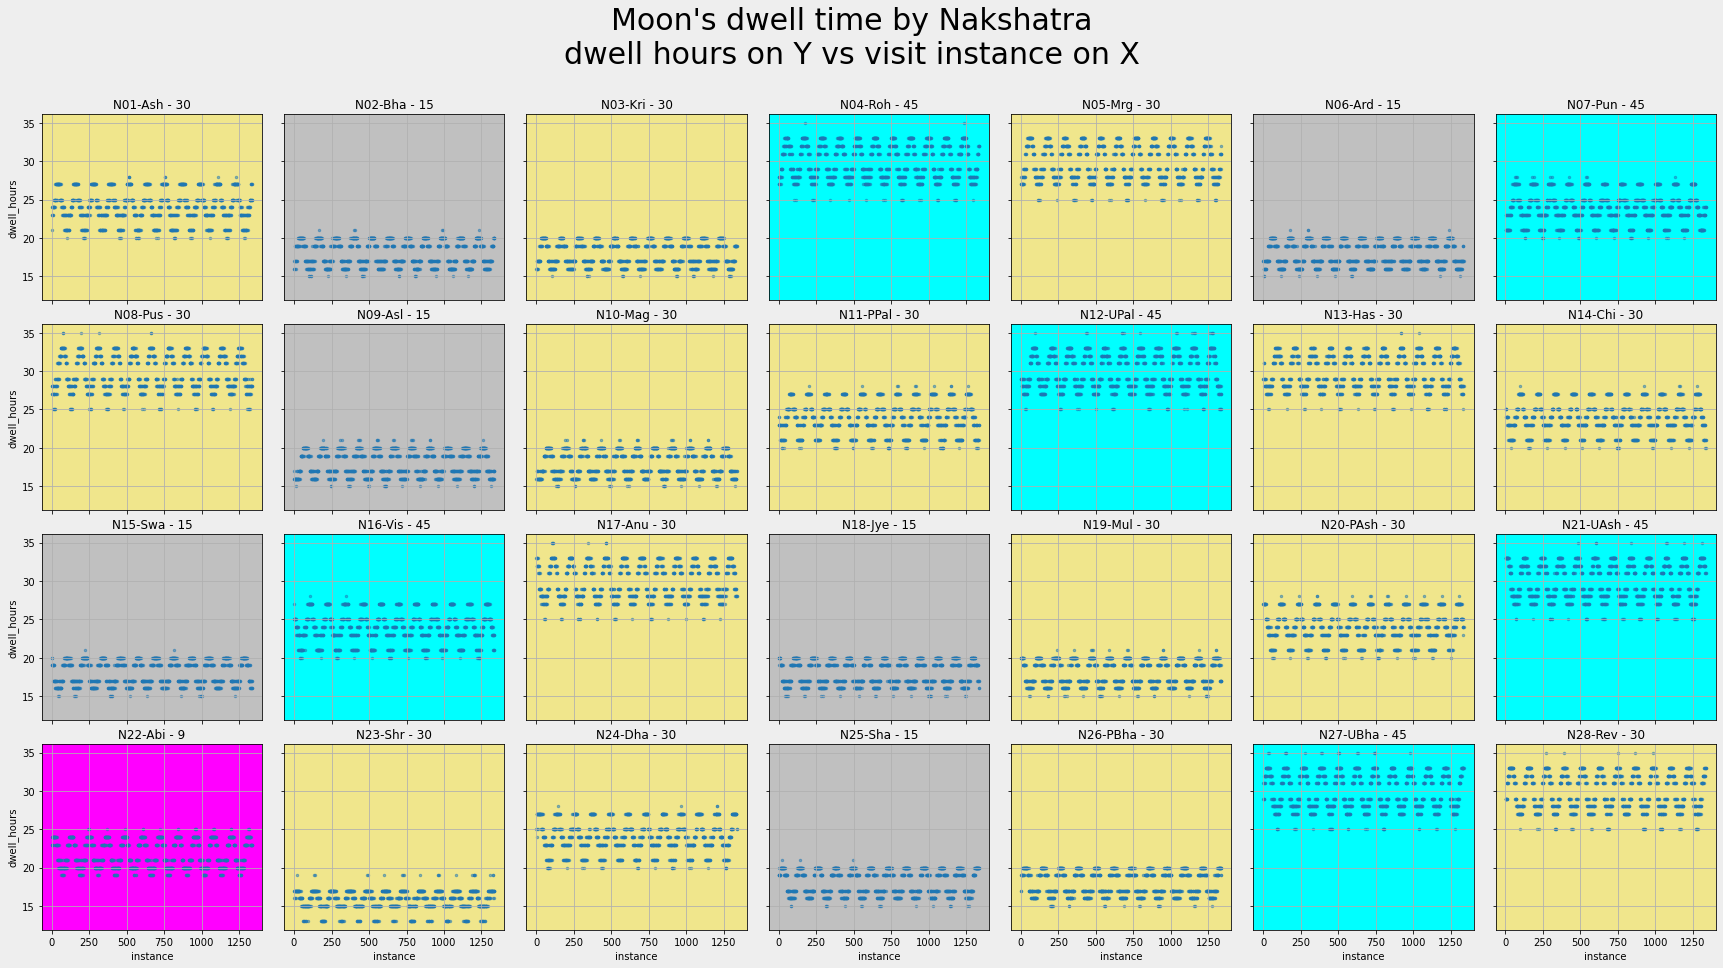

In [543]:
fig, axs = plt.subplots(4,7, figsize=(30,15), sharex=True, sharey=True, gridspec_kw={'hspace': .13, 'wspace': .1})
axs = axs.flatten()
fig.suptitle(f"Moon's dwell time by Nakshatra\ndwell hours on Y vs visit instance on X", fontsize=30)
fig.set_facecolor('#EEEEEE')

for nid, df_ in mdf_boundary_cross.groupby('nid'):
	idx , muhurta = df_.iloc[0].idx_scp, int(df_.iloc[0].muhurta)
	# display(df_)
	df_['instance'] = range(1,len(df_)+1)
	df_['dwell_hours'] = df_.dwell_time.apply(lambda x: round(x*24,0))
	ax = df_.plot.scatter( x = 'instance', y = 'dwell_hours', ax=axs[idx], alpha=0.5, s=6, grid=True, title=f"{nid} - {int(muhurta)}")
	colors = {'45':'cyan', '30':'khaki', '15':'silver'}
	color = colors[str(muhurta)] if str(muhurta) in colors else  '#ff00ff' 
	ax.set_facecolor(color)

In [215]:
!rm ./cahc_explore.html 2>/dev/null
!date

Wed Jan 12 20:18:58 IST 2022


In [216]:
!~/anaconda3/bin/jupyter nbconvert cahc_explore.ipynb --to html --no-input --output  cahc_explore.html 2>&1 | tee ~/tmp/nbconvert.log
!open ./cahc_explore.html

[NbConvertApp] Converting notebook cahc_explore.ipynb to html
[NbConvertApp] Writing 3216026 bytes to cahc_explore.html
